In [1]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway

In [2]:
#Reading dataset from csv file

service_request_df = pd.read_csv(r'C:\\Users\hp\Downloads\Data Science with Python Two\311_Service_Requests_from_2010_to_Present.csv')
original_data = service_request_df.copy()
service_request_df.head()

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
#Shape of the dataset

service_request_df.shape

(300698, 53)

In [4]:
#Checking for null values in the dataset

service_request_df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [5]:
#Checking data types

service_request_df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [6]:
#Converting Created Date and Closed Date  object data type to datetime data type

service_request_df['Created Date'] = pd.to_datetime(service_request_df['Created Date'])
service_request_df['Closed Date'] = pd.to_datetime(service_request_df['Closed Date'])
service_request_df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [7]:
#Creating new column and assigning time difference data to it 

service_request_df['Request_Closing_Time'] = service_request_df['Closed Date'] - service_request_df['Created Date']
service_request_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [8]:
#Function to convert TimeDelta in hours

def convert_to_hr(a):
    days = a.days
    hours = round(a.seconds/3600, 3)
    total_hrs = (days * 24) + hours
    return total_hrs


In [9]:
service_request_df['Request_Closing_Time_in_hr'] = service_request_df['Request_Closing_Time'].apply(convert_to_hr)
service_request_df['Request_Closing_Time_in_hr'].head()

0    0.921
1    1.438
2    4.859
3    7.754
4    3.451
Name: Request_Closing_Time_in_hr, dtype: float64

In [10]:
service_request_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_in_hr
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.921
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1.438
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,4.859
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,7.754
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,3.451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31,2.009
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17,3.121
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33,4.093


In [11]:
#Function to Characterize Request_Closing_time as follows
#Below 2 hours - Fast, between 2 to 4 hours - Acceptable, 4 to 6 hours - Slow, More than 6 hours - Very slo

In [12]:
import math

def hr_to_catogory(hr):
    if math.isnan(hr):
        return('unavailable')
    elif hr <= 2:
        return('Fast')
    elif hr > 2 and hr <= 4:
        return('Acceptable')
    elif hr > 4 and hr <= 6:
        return('Slow')
    else:
        return('Very Slow')    
        

In [13]:
service_request_df['Request_Closing_Time_in_hr_catogory'] = service_request_df['Request_Closing_Time_in_hr'].apply(hr_to_catogory)

In [14]:
service_request_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_in_hr,Request_Closing_Time_in_hr_catogory
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.921,Fast
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1.438,Fast
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,4.859,Slow
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,7.754,Very Slow
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,3.451,Acceptable


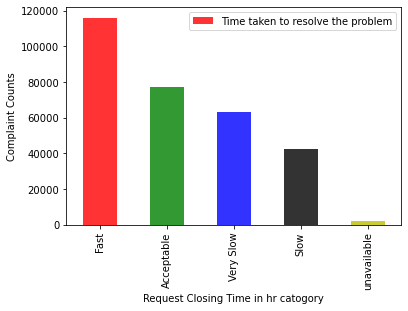

In [15]:
service_request_df['Request_Closing_Time_in_hr_catogory'].value_counts().plot(kind = 'bar', label = 'Time taken to resolve the problem' , color = list('rgbkymc'), alpha = 0.8)
plt.xlabel('Request Closing Time in hr catogory')
plt.ylabel('Complaint Counts')
plt.legend()
plt.show()

In [16]:
months = pd.Series({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})
months

1      Jan
2      Feb
3      Mar
4      Apr
5      May
6     June
7     July
8      Aug
9      Sep
10     Oct
11     Nov
12     Dec
dtype: object

In [17]:
print(service_request_df['Created Date'].dtypes)

datetime64[ns]


In [18]:
#Creating another function to create another coloumn for Created months seperately 

def getMonth(cd):
    daate = cd
    return months[daate.month]

In [19]:
#Creating another coloumn for Created months seperately 

service_request_df['Created Month'] = service_request_df['Created Date'].apply(getMonth)
service_request_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_in_hr,Request_Closing_Time_in_hr_catogory,Created Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.921,Fast,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1.438,Fast,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,4.859,Slow,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,7.754,Very Slow,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,3.451,Acceptable,Dec


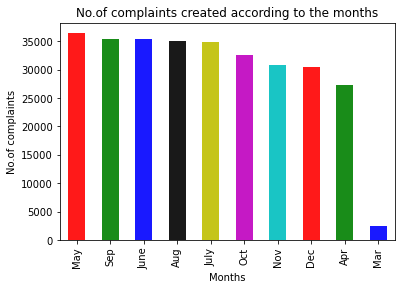

In [20]:
service_request_df['Created Month'].value_counts().plot(kind = 'bar', color = list('rgbkymc'), alpha = 0.9)
plt.xlabel('Months')
plt.ylabel('No.of complaints')
plt.title('No.of complaints created according to the months')
plt.show()

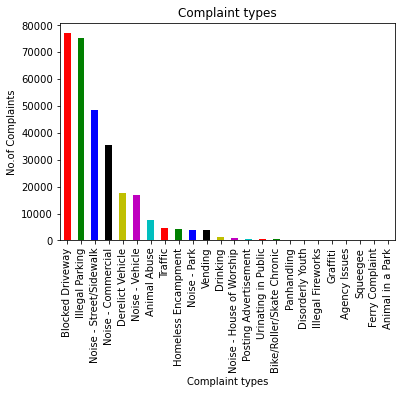

In [21]:
#Complaint types with number

service_request_df['Complaint Type'].value_counts().plot(kind = 'bar',color = list('rgbkymc'))
plt.title('Complaint types')
plt.xlabel('Complaint types')
plt.ylabel('No.of Complaints')
plt.show()

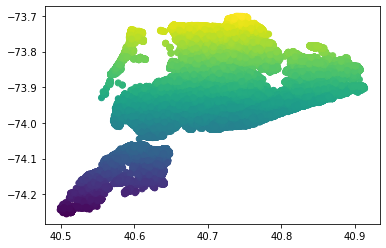

In [22]:
#Complaints acquired by latitide and longitude area

plt.scatter(service_request_df['Latitude'], service_request_df['Longitude'], c = service_request_df['Longitude'])

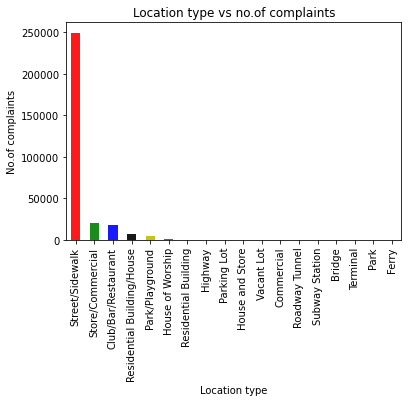

In [23]:
#Bar graph for Location Type vs No.of Complaints

service_request_df['Location Type'].value_counts().plot(kind = 'bar', color = list('rgbkymc'), alpha = 0.9)
plt.title('Location type vs no.of complaints')
plt.xlabel('Location type')
plt.ylabel('No.of complaints')
plt.show()

In [24]:
#Ordering the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

Avg_req_closing_time_city_diff_loc = service_request_df.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_hr'].mean()
Avg_req_closing_time_city_diff_loc

City      Complaint Type         
ARVERNE   Animal Abuse               2.153605
          Blocked Driveway           2.526029
          Derelict Vehicle           2.968148
          Disorderly Youth           3.591500
          Drinking                   0.239000
                                       ...   
Woodside  Blocked Driveway           6.406182
          Derelict Vehicle           4.966500
          Illegal Parking            5.219230
          Noise - Commercial         2.394000
          Noise - Street/Sidewalk    3.411400
Name: Request_Closing_Time_in_hr, Length: 764, dtype: float64

**From the above data null hypothesis can be rejected. Since the average response time across complaint type are not equal. 
Null Hypothesis : Average response time across complaint type are equal. 
Alternate Hypothesis : Average response time across complaint type are not equal.**

In [25]:
Avg_response_time_comp_type = service_request_df.groupby(['Complaint Type'])['Request_Closing_Time_in_hr'].mean().sort_values(ascending = True)
Avg_response_time_comp_type

Complaint Type
Posting Advertisement          1.975802
Illegal Fireworks              2.761173
Noise - Commercial             3.147155
Noise - House of Worship       3.193297
Noise - Park                   3.410734
Noise - Street/Sidewalk        3.445224
Traffic                        3.448681
Disorderly Youth               3.558577
Noise - Vehicle                3.588997
Urinating in Public            3.626682
Bike/Roller/Skate Chronic      3.766450
Drinking                       3.861831
Vending                        4.013915
Squeegee                       4.045750
Homeless Encampment            4.365578
Panhandling                    4.372751
Illegal Parking                4.501152
Blocked Driveway               4.740904
Animal Abuse                   5.213242
Agency Issues                  5.260000
Graffiti                       7.151248
Derelict Vehicle               7.364142
Animal in a Park             336.835000
Ferry Complaint                     NaN
Name: Request_Closing_Tim

**Oneway anova test for Urinating in public and Disorderly youth**

In [26]:
uri_pbc = service_request_df[service_request_df['Complaint Type'] == 'Urinating in Public']
uri_pbc = uri_pbc.loc[:, ['Request_Closing_Time_in_hr']]
uri_pbc.head()

,Request_Closing_Time_in_hr
586,5.814
654,0.884
1150,4.938
4777,2.208
6090,1.633


In [27]:
dis_you = service_request_df[service_request_df['Complaint Type'] == 'Disorderly Youth']
dis_you = dis_you.loc[:, ['Request_Closing_Time_in_hr']]
dis_you.head()

,Request_Closing_Time_in_hr
4670,0.198
9034,1.279
12027,0.651
12176,5.393
17181,1.903


In [28]:
#Performing oneway anova test

fvalue, pvalue = stats.f_oneway(uri_pbc, dis_you)
print('fvalue = ', fvalue)
print('pvalue = ', pvalue)
if pvalue > 0.05:
    print('Null hypothesis(H0) is accepted')
else:
    print('Alternate hypothesis(H1) is considered')

fvalue =  [0.04041896]
pvalue =  [0.8407103]
Null hypothesis(H0) is accepted


**As pvalue is more than 0.05, we are accepting the null hypothesis(H0)**

**Chi square test for Compliant Type and Location**

In [29]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [30]:
df_com_loc_type = pd.crosstab(service_request_df['City'], service_request_df['Complaint Type'])
df_com_loc_type.head()

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,0,35,27,2,1,1,4,0,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,0,15,2618,351,3,35,4,32,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,116,12,0,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,37,0,0,377,198,1,1,3,2,0,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,7,0,1,95,89,2,1,0,1,1,...,1,1,13,10,1,1,0,7,1,0


In [31]:
#Contingency table

table = df_com_loc_type
table.head()

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,0,35,27,2,1,1,4,0,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,0,15,2618,351,3,35,4,32,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,116,12,0,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,37,0,0,377,198,1,1,3,2,0,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,7,0,1,95,89,2,1,0,1,1,...,1,1,13,10,1,1,0,7,1,0


In [32]:
stat, p, dof, expected = chi2_contingency(table)
print('Degree of freedom: ', dof)
print('Expected values: ', expected)
print('Stat value: ', stat)
print('pvalue: ', p)

#interpretation of test statistic
prob = 0.95  

critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (Failed to reject H0)')
    
#interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Degree of freedom:  1092
Expected values:  [[5.73241100e+00 7.38046993e-04 3.11455831e-01 ... 3.31752124e+00
  4.36923820e-01 2.80088834e+00]
 [1.64937098e+02 2.12356249e-02 8.96143369e+00 ... 9.54541337e+01
  1.25714899e+01 8.05891963e+01]
 [1.86824486e+01 2.40536225e-03 1.01506287e+00 ... 1.08121033e+01
  1.42397445e+00 9.12834973e+00]
 ...
 [6.42030032e+01 8.26612633e-03 3.48830531e+00 ... 3.71562378e+01
  4.89354679e+00 3.13699494e+01]
 [9.23439299e+01 1.18892661e-02 5.01727030e+00 ... 5.34422512e+01
  7.03844554e+00 4.51197649e+01]
 [3.12676964e+00 4.02571087e-04 1.69884999e-01 ... 1.80955704e+00
  2.38322084e-01 1.52775728e+00]]
Stat value:  119769.34666374496
pvalue:  0.0
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


**As pvalue is less than 0.05, we are rejecting the null hypothesis(H0)**